#**Проект "World vaccination data analysis" для МФК Основы программирования и анализа данных на Python**###

Данные из:
https://www.kaggle.com/gpreda/covid-world-vaccination-progress
https://github.com/owid/covid-19-data

## Скачиваю данные, импортирую их в таблицу, пустые значения заменяю на '-1'

In [1]:
# импортирую все библиотеки, которые буду использовать
from google.colab import output
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Список европейских стран (50 штук)
european_countries = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Guernsey', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Jersey', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'North Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']

# Список азиатских стран (47 штук)
asian_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon',  'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal',  'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

# Список африканских стран (52 штуки)
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',  'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Congo', 'Rwanda', 'Saint Helena', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan',  'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

# Список североамериканских стран (33 штуки)
north_american_countries = ['Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'British Virgin Islands', 'Canada', 'Cayman Islands', 'Costa Rica', 'Cuba', 'Curacao', 'Dominica', 'Dominican Republic', 'El Salvador', 'Greenland', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Montserrat', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sint Maarten (Dutch part)', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'United States']

# Список южноамериканских стран 13 штук
south_american_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']

# Список стран океании (45 штук)
oceania_countries= [ 'Australia', 'Cook Islands', 'Fiji', 'French Polynesia', 'Kiribati',  'Nauru', 'New Caledonia', 'New Zealand', 'Niue', 'Papua New Guinea', 'Pitcairn', 'Samoa', 'Solomon Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu', 'Wallis and Futuna']

In [3]:
# скачиваю файл с данными о вакцинациях в разных странах с github
!wget -O "vaccinations.csv" "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
output.clear()

In [4]:
# шапка проекта - какие столбцы туда входят
aefcdaewxAvcs = np.genfromtxt("vaccinations.csv", delimiter=',', dtype=str)
print(aefcdaewxAvcs[0, 0:4])

['location' 'iso_code' 'date' 'total_vaccinations']


In [5]:
# скачиваю все данные без шапки. Скачиваю 3 колонки с данными: Страна, Дата, Кол-во вакцинаций
all_the_data = np.genfromtxt("vaccinations.csv", delimiter=',', dtype=str, skip_header=1, usecols=(0, 2, 3))  

In [6]:
# Создаю таблицу из пар строк (1. Даты 2. Вакцинации) для каждой страны из списка моих стран по Европе
table = []

for i in european_countries:
  statistic_of_a_country = (filter(lambda x: x[0]==i, all_the_data))
  country, dates, country_vaccs = np.transpose(list(statistic_of_a_country))  # транспонирую матрицу, чтобы данные распологались по строкам и передаю эти данные в новые списки
  country_vaccs = list(map(lambda x: int(x) if x!= '' else -1, country_vaccs)) # все пустые значения заменяю на -1

  table.append(dates)               # добавляю в таблицу даты вакцинаций 
  table.append(country_vaccs)       # добавляю в таблицу количества вакцинаций

- нужно обработать пропущенные значения для всей таблицы  >  **done**
- построить два типа графиков: в абсолютных количествах вакцинаций и в процентном отношении на количество населения
- оформить красиво график - красиво оформлен график в "Семинар_№6"

## Обработка пропущенных значений



In [7]:
# Функция поиска индекса первого отрицательного значения в списке, начиная с текущего индекса
def find_first_na_idx(lst, first_idx):
  for idx in range(first_idx, len(lst)):
    if lst[idx]==-1:
      return idx
  return -1

# Функция поиска индекса первого НЕОТРИЦАТЕЛЬНОГО значения в списке, начиная с текущего индекса
def find_first_not_na_idx(lst, first_idx):
  for idx in range(first_idx, len(lst)):
    if lst[idx]!=-1:
      return idx
  return -1

# можно создать func(), которая выполняет действия в следующей ячейке (лианизирует пропуски)

In [8]:
# пустые точки заменяю точками, которые лежат на прямой соединяющей две соседние не нулевые точки
for i in range(1,len(table),2):
    country_vaccs = table[i]
    idx=0
    while idx>=0 and idx<len(country_vaccs):
        idx_na = find_first_na_idx(country_vaccs, idx)
        if idx<0 or idx>=len(country_vaccs):
            break
        idx_not_na = find_first_not_na_idx(country_vaccs, idx_na)

        # выполняю проверку на присутствие '-1' на самом конце - если '-1' есть, то будет ошибка
        # оставшиеся -1 заменяю на последнее максимальное число
        if country_vaccs[idx_not_na] == -1:
            country_vaccs[idx_not_na] = country_vaccs[idx_na-1]
            idx_not_na = len(country_vaccs)-1
        # проверяю если первое же число - '-1', то тогда запускаю алгоритм, который проводит лианеризацию начиная с 0, а не с предыдущего положительного числа
        if idx_na != 0:
            country_vaccs[idx_na:idx_not_na] = np.linspace(country_vaccs[idx_na-1], country_vaccs[idx_not_na], idx_not_na-idx_na)
        else:
            country_vaccs[idx_na:idx_not_na] = np.linspace(0, country_vaccs[idx_not_na], idx_not_na-idx_na)

        idx = idx_not_na
    table[i] = country_vaccs

## Рисую красивый график

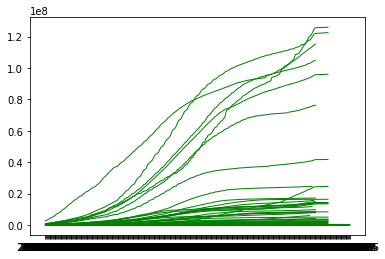

In [9]:
for i in range(0,len(table),2):
    plt.plot(table[i], table[i+1], linewidth=1, color='green')  
plt.show()

## График каждой страны

Введите название страны: Spain


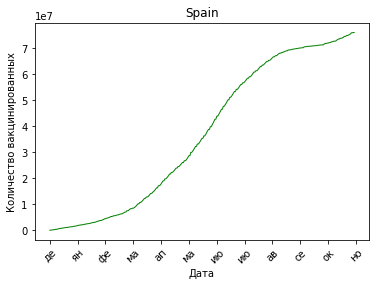

In [10]:
#   надо проверить как получилась каждая кривая
# i = 0, 2, ... 48
country = input('Введите название страны: ')
i = european_countries.index(country)*2
# i = 36
plt.title(european_countries[int(i/2)])
plt.xlabel('Дата')
plt.ylabel('Количество вакцинированных')

tick_values = list(range(0, 365, 30))
# месяцы могут быть другие
tick_names = ['декабрь', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь' ] 
tick_names_new = [elem[:2] for elem in tick_names]
plt.xticks(tick_values, tick_names_new, rotation =45)

plt.plot(table[i], table[i+1], linewidth=1, color='green')  
plt.show()

##Код, который я раньше писал

In [11]:
# тут все надо будет переделать более удобным способом с помощью numpy

data = []
vax = []
with open("vaccinations_Russia.csv", 'r') as file:
    for line in file:
      # print(line.split(',')[3])
      if line.split(',')[3]:
        data.append(line.split(',')[2])
        vax.append(line.split(',')[3])
# print(len(data), len(vax))

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ticks = (0,30,60,90,120,150)
labels = ('март', 'апрель', 'май', 'июнь', 'июль', 'август')

plt.plot(data,vax)
plt.title('Количество вакцинированных в России')
plt.xlabel('Месяц')
plt.ylabel('ЧИсло вакцинаций')


plt.xticks(ticks, labels)

plt.grid()


plt.show()

FileNotFoundError: ignored

In [ ]:
!wget -O "vaccinations.csv" "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"

In [ ]:
                                                      # создаю список стран - 235 штук - можно сделать проще с numpy, надо переделать этот код
countries = []
with open("vaccinations.csv", 'r') as file:
    file.readline()                                   # первая строка - заголовок, ее просто читаю и пропускаю
    for line in file:
      if line.split(',')[3]:                          # читаю только те строки, где есть число вакцинированных 
        countries.append(line.split(',')[0])
countries = set(countries)
# print(countries)
# len(countries)

In [ ]:
                                                      # создаю список с максимальным количеством вакцинаций в стране
max_vax_data_for_country = []
with open("vaccinations.csv", 'r') as file:
    file.readline()
    for country in countries:
      x = 0
      for line in file:
        if line.split(',')[3]:
          if int(line.split(',')[3]) > x:
            x = int(line.split(',')[3])
            max_vax_data_for_country.append(x)
          else:
            continue

# len(max_vax_data_for_country)
max_vax_data_for_country[:10]


    # for line in file:
    #   if line.split(',')[3]:
    #     countries.append(line.split(',')[0])
    #     data.append(int(line.split(',')[3]))
        # vax.append(int(line.split(',')[3]))

# тут все работает, я считал все даты и все колчиества вакцинаций

In [ ]:
countries

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ticks = (0,30,60,90,120,150)
labels = ('март', 'апрель', 'май', 'июнь', 'июль', 'август')

plt.plot(data,vax)
plt.title('Количество вакцинированных в России')
plt.xlabel('Месяц')
plt.ylabel('ЧИсло вакцинаций')


plt.xticks(ticks, labels)

plt.grid()
